要在 AWS Elastic Beanstalk 上部署模型（例如使用 YOLO 物件檢測模型）並結合 FastAPI 和 Docker，以下是逐步指引，協助你完成這門課程：

## 方式一

### 步驟 1：準備 FastAPI 與 Docker 應用程式
1. **確保你的 FastAPI 和 Docker 應用程式已經在本地成功運行**。
   - 你的應用應該包含 YOLO 模型推理邏輯，並且能夠透過 API 接受圖片並返回檢測結果。

### 步驟 2：註冊並設定 AWS Elastic Beanstalk

1. **註冊 AWS 帳號**：
   如果你還沒有 AWS 帳號，前往 [AWS 官網](https://aws.amazon.com/) 註冊帳號。

2. **安裝 AWS CLI**：
   AWS Command Line Interface (CLI) 是一個命令行工具，可以幫助你從本地管理 AWS 服務。
   - 安裝指引：[AWS CLI 安裝](https://docs.aws.amazon.com/cli/latest/userguide/install-cliv2.html) 下載並安裝適合你操作系統的版本。
   - 安裝完成後，使用以下命令確認安裝是否成功：
   ```bash
   aws --version
   ```

3. **配置 AWS CLI**：
   配置 AWS CLI 以連接到你的 AWS 帳戶，執行以下命令：
   
   ```bash
   aws configure
   ```

   系統將要求你輸入 AWS **Access Key**、**Secret Key**、**Region** 等資訊。

### 步驟 3：創建 Elastic Beanstalk 應用程式

1. **安裝 Elastic Beanstalk CLI**：
   - 使用以下命令安裝 Elastic Beanstalk CLI：
     ```bash
     pip install awsebcli
     ```

2. **初始化 Elastic Beanstalk 應用**：
   - 在你的 FastAPI 應用目錄下，運行以下命令來初始化 Elastic Beanstalk 應用：
     ```bash
     eb init
     ```
   - 選擇你的 AWS 區域，並選擇應用的平臺為 Docker。

3. **創建 Elastic Beanstalk 環境並部署應用**：
   - 創建一個 Elastic Beanstalk 環境並將應用部署到該環境：
     ```bash
     eb create fastapi-env
     ```
   - 然後，運行以下命令來部署應用：
     ```bash
     eb deploy
     ```

4. **訪問應用**：
   - 部署成功後，你可以通過 Elastic Beanstalk 提供的 URL 訪問應用：
     ```bash
     eb open
     ```

### 步驟 4：檢查部署狀態

1. **檢查部署狀態**：
   在部署完成後，你可以檢查應用程式的狀態：

   ```bash
   eb status
   ```

2. **查看應用程式**：
   一旦部署成功，你可以在 AWS Elastic Beanstalk 提供的 URL 上訪問你的 FastAPI 應用。這個 URL 會顯示在 `eb status` 命令的輸出中，通常看起來像這樣：
   
   ```
   http://<environment-name>.<region>.elasticbeanstalk.com
   ```

3. **測試 FastAPI**：
   使用 Postman 或是 curl 測試你應用的 API 端點來確認 YOLO 模型是否可以正常推理，並返回檢測結果。

### 步驟 5：後續操作

1. **監控與調整**：
   AWS Elastic Beanstalk 提供了監控、縮放、自動擴展等功能，這可以幫助你在生產環境中管理模型部署。

2. **費用控制**：
   別忘了你可以設置 EC2 實例類型和其他相關服務以控制成本，或者在使用完畢後，刪除環境避免產生額外費用。

這就是整個課程流程，你可以開始準備本地應用程式並進行 Elastic Beanstalk 上的部署。Elastic Beanstalk 提供自動化部署和擴展功能，讓你能更快地在雲端測試應用和模型。

---

## 方式二

### **至 AWS 官網 進行搭建環境**

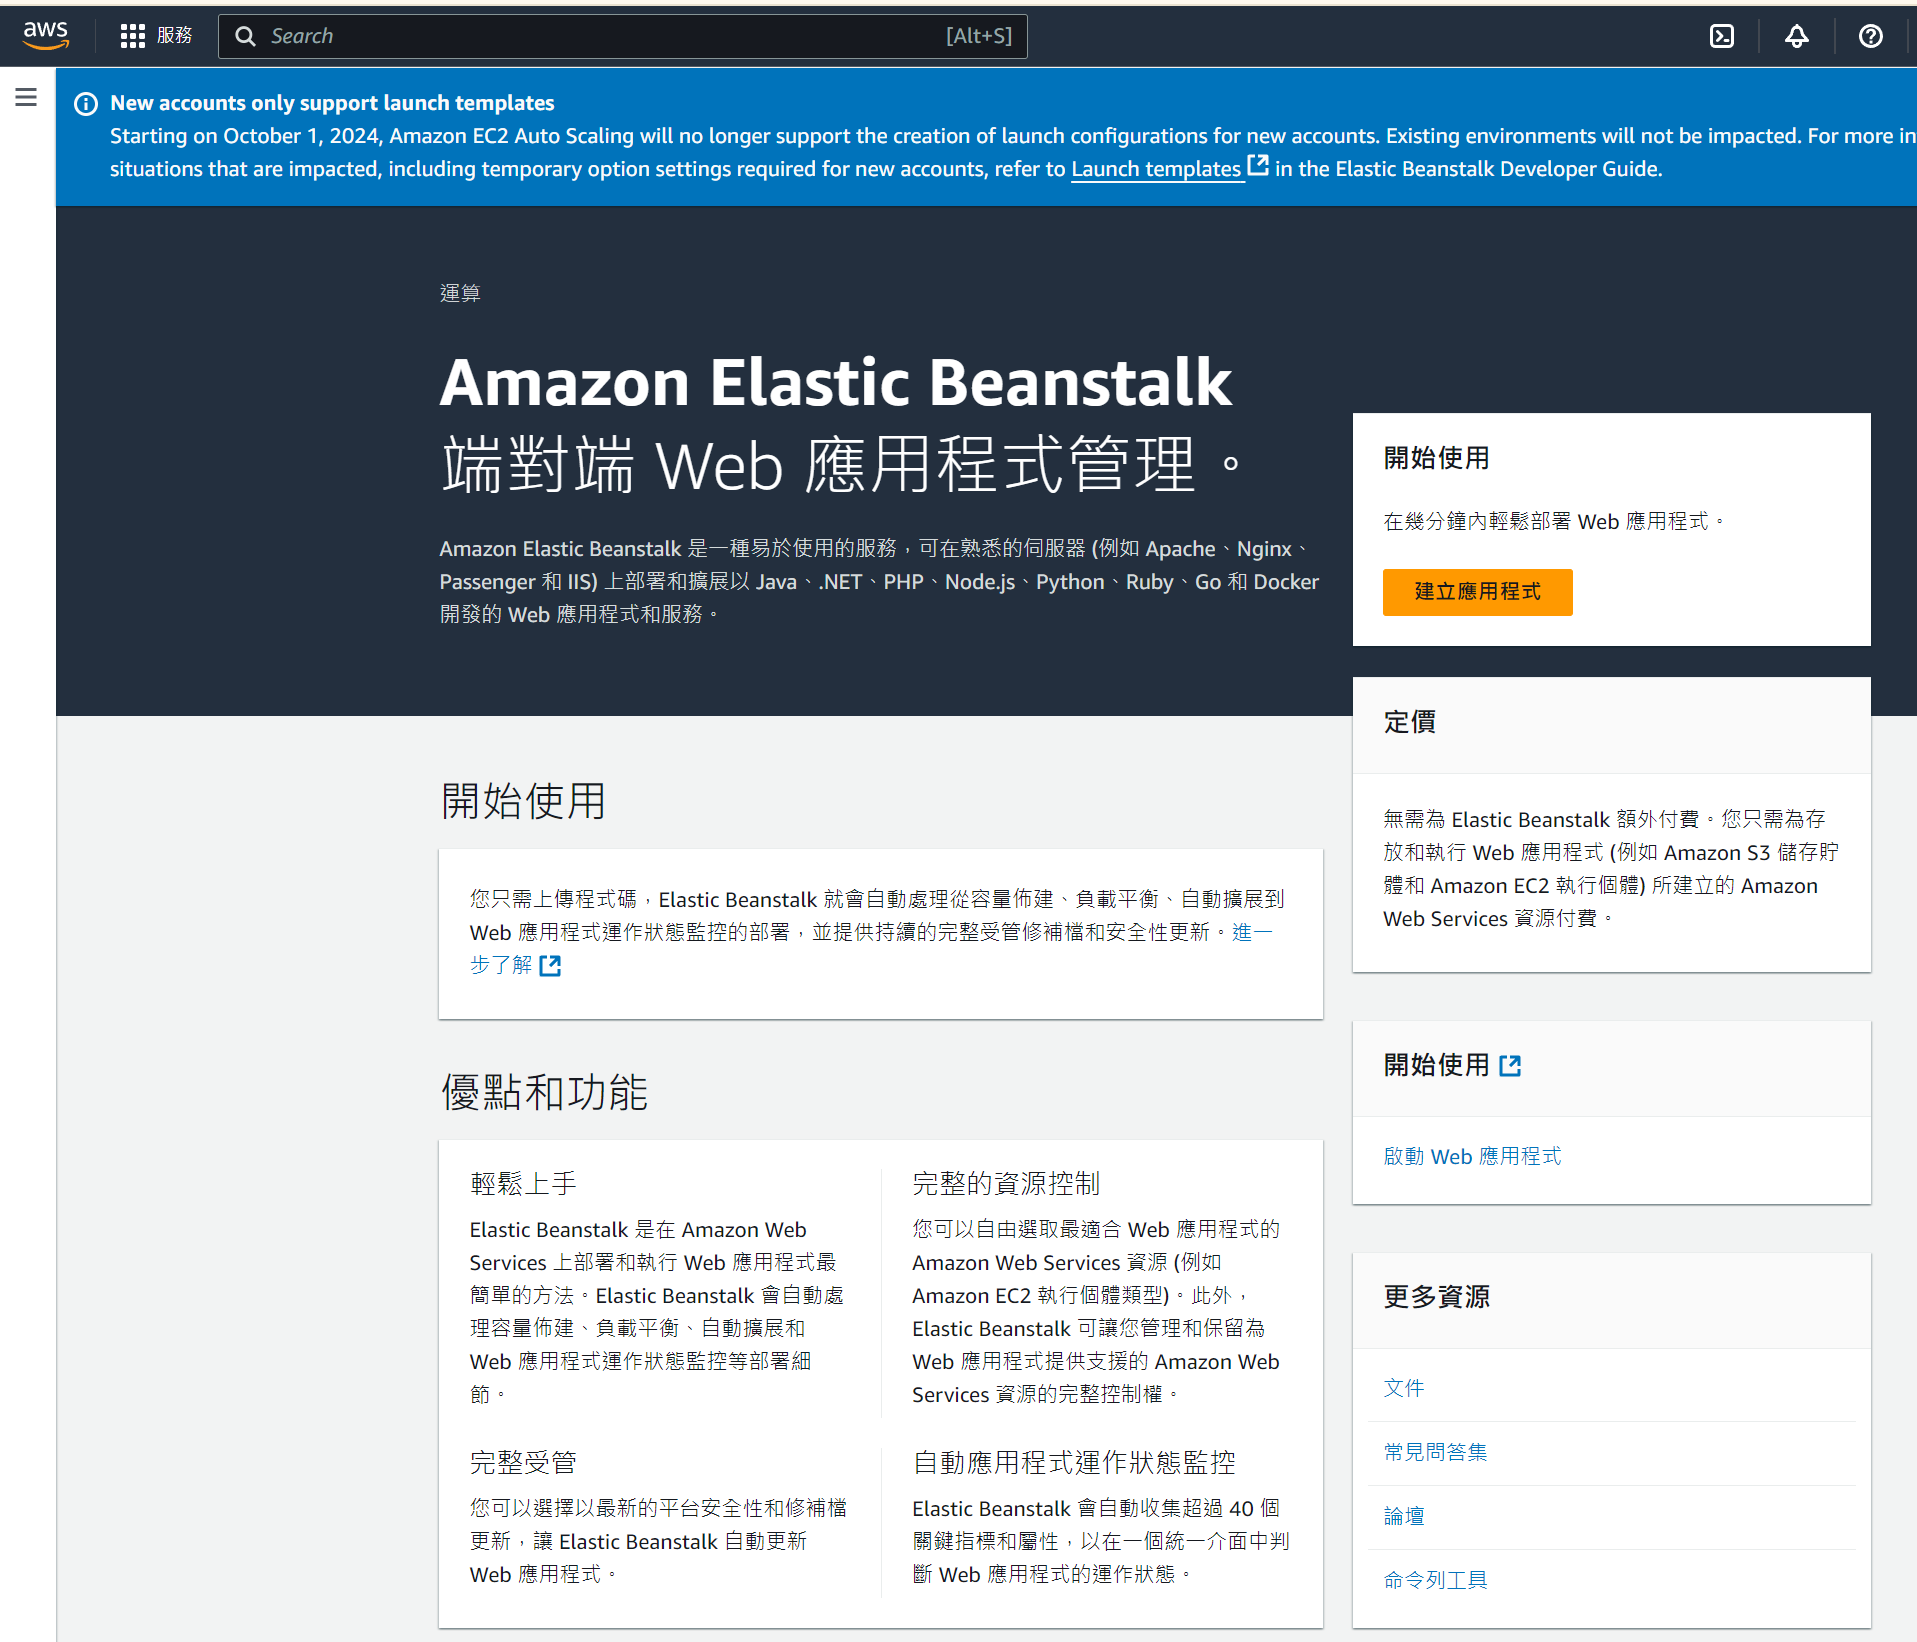

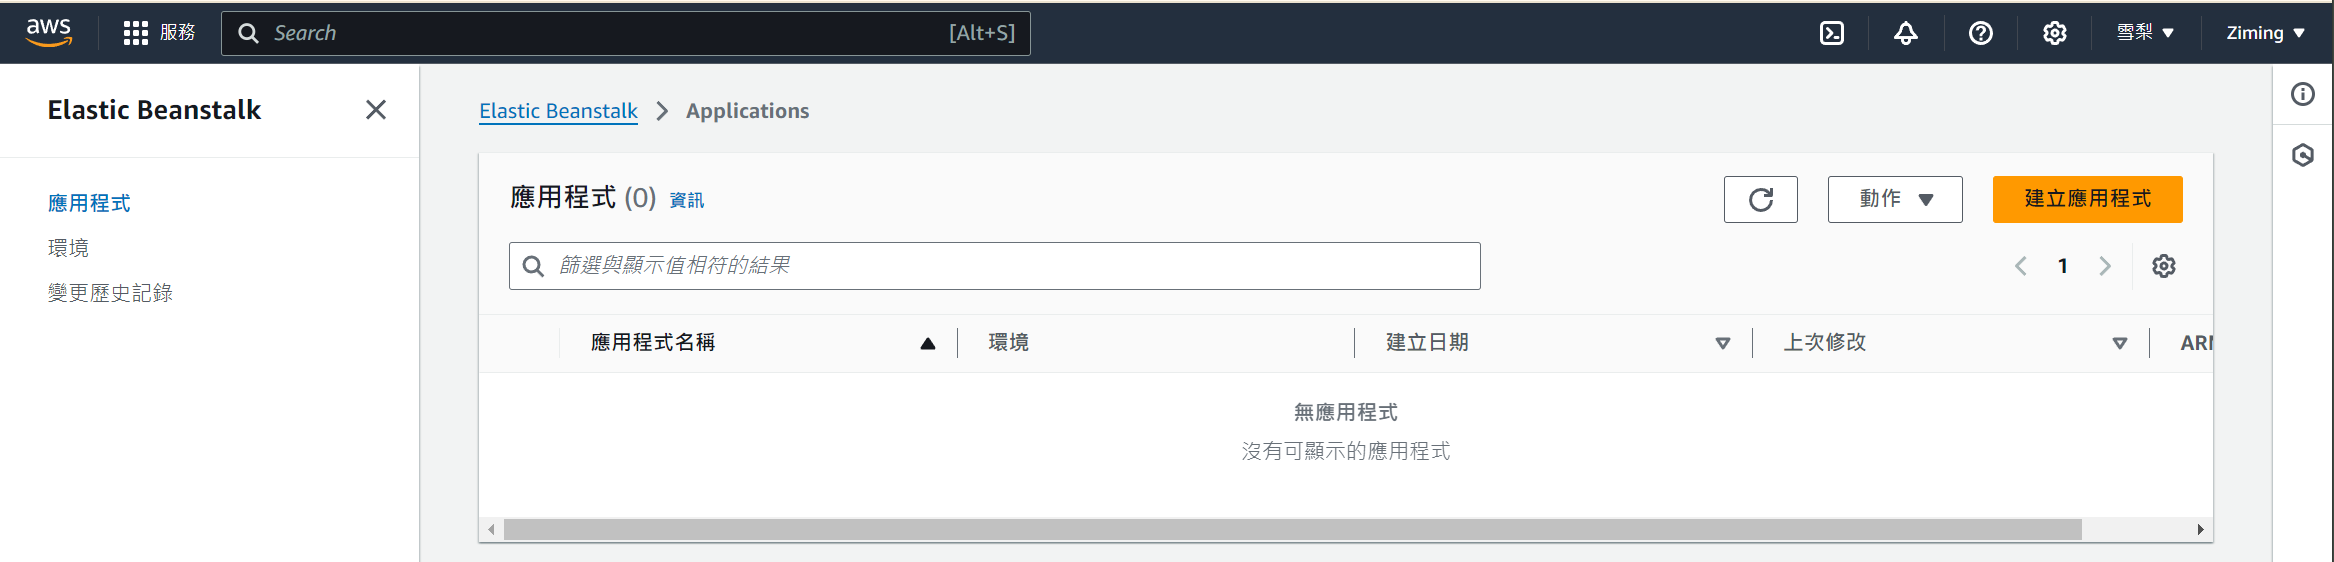

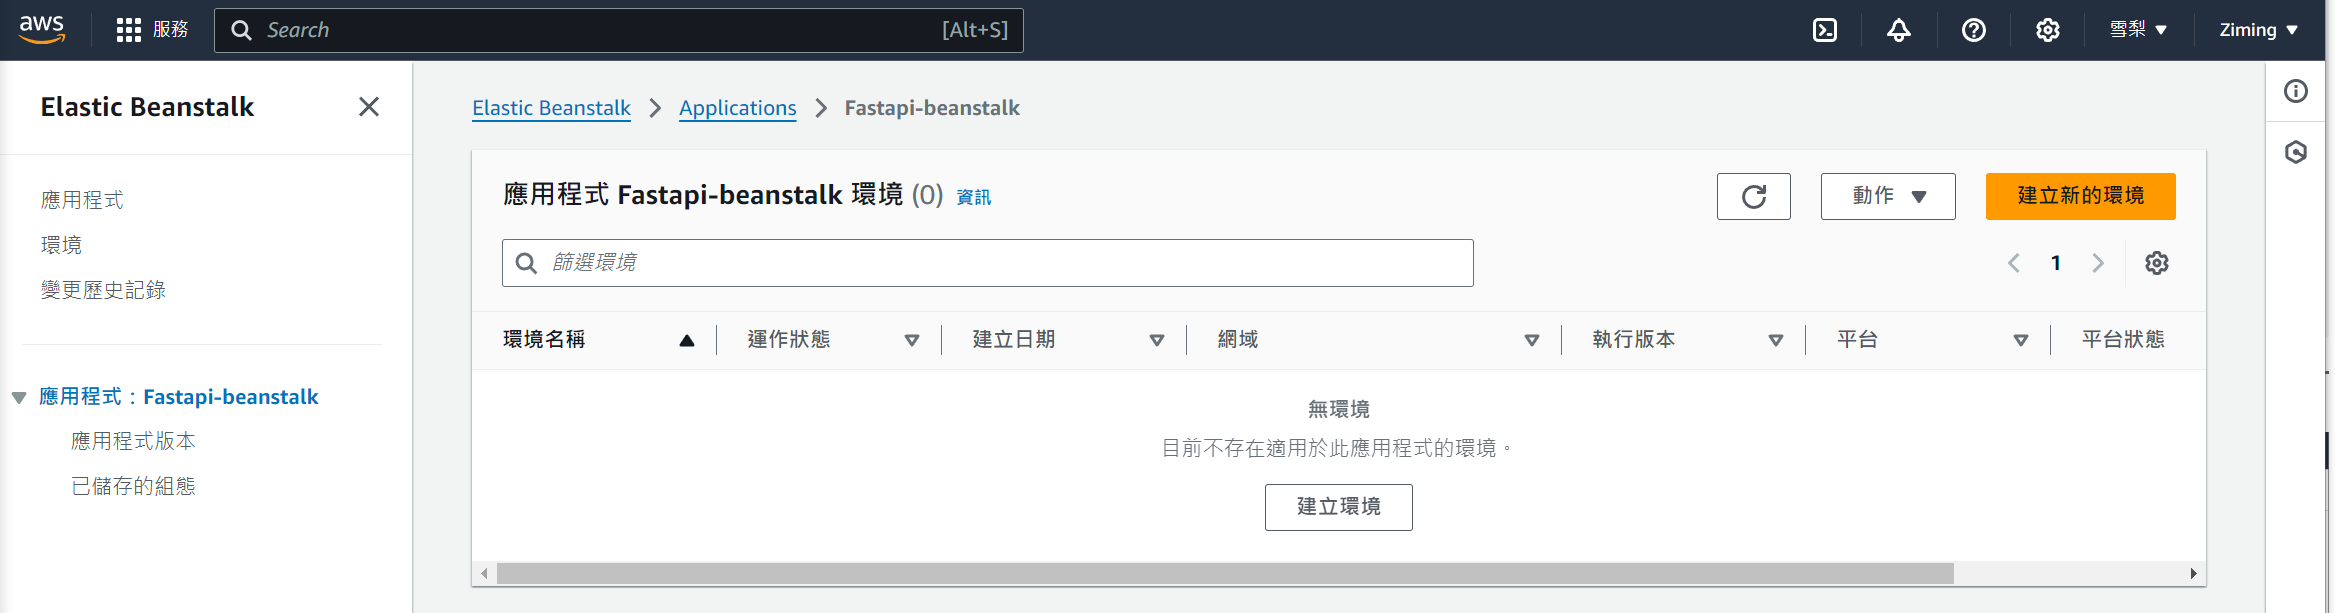

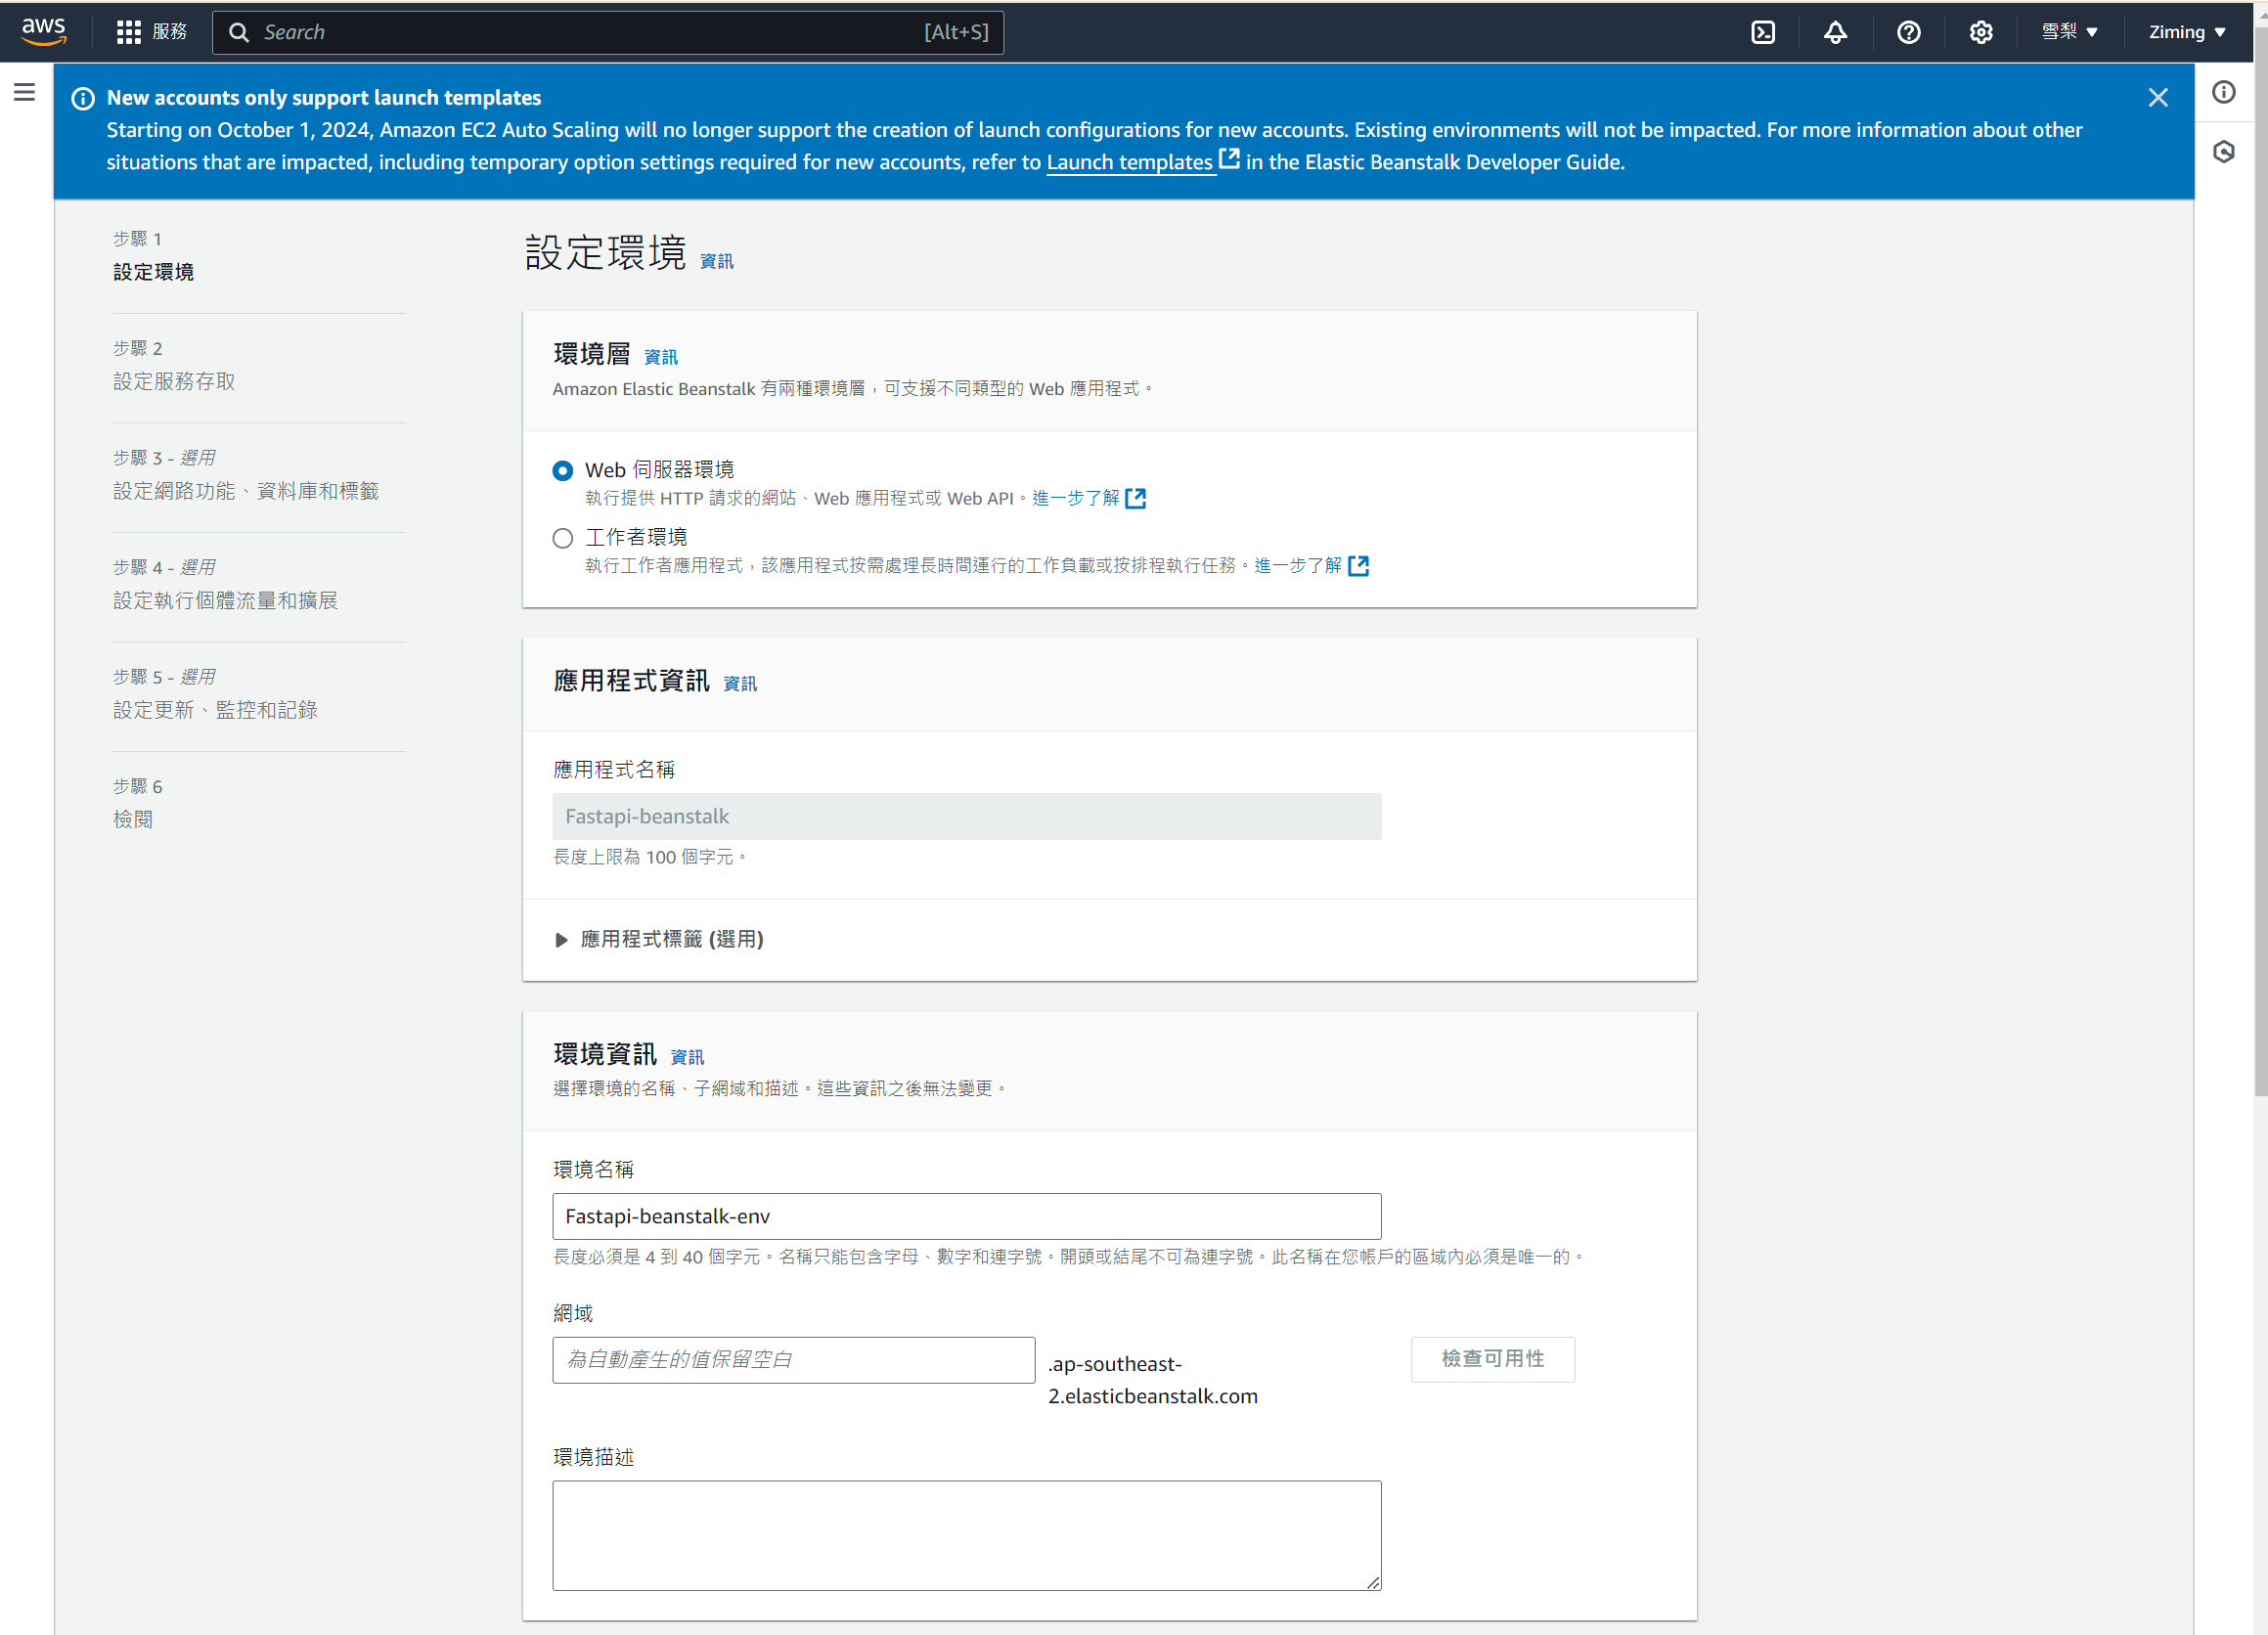

1. **上傳程式碼**：這是你已經準備好部署的應用程式碼包，通常是包含了 FastAPI 應用和 Docker 設定的壓縮檔（例如 `.zip`），這個檔案會被上傳到 AWS Elastic Beanstalk 並執行。
   
   如果你要上傳自己的應用程式碼，應該選擇這個選項。你需要確保：
   - 應用程式包含了你的 Dockerfile。
   - 可能需要一個 `requirements.txt` 或 `Pipfile` 文件來定義 Python 的依賴包。

由於你是要部署 FastAPI 和 Docker 應用，請選擇「**上傳程式碼**」並上傳包含應用程式的壓縮檔。

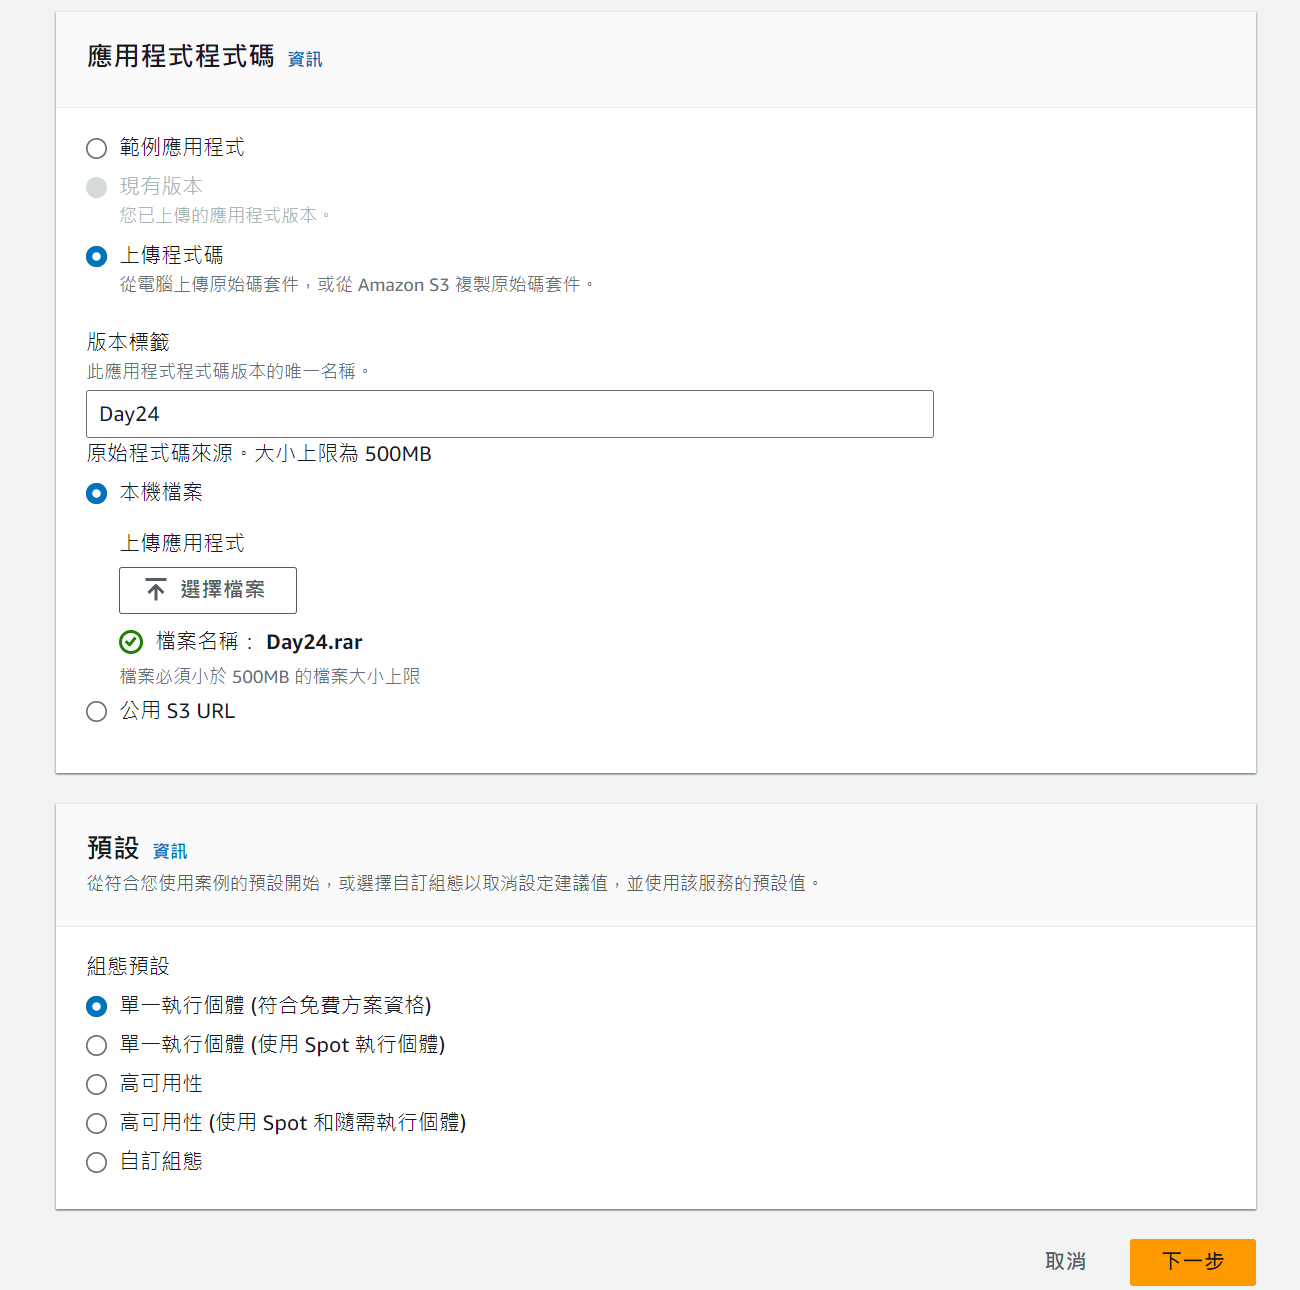

---
此可跳過
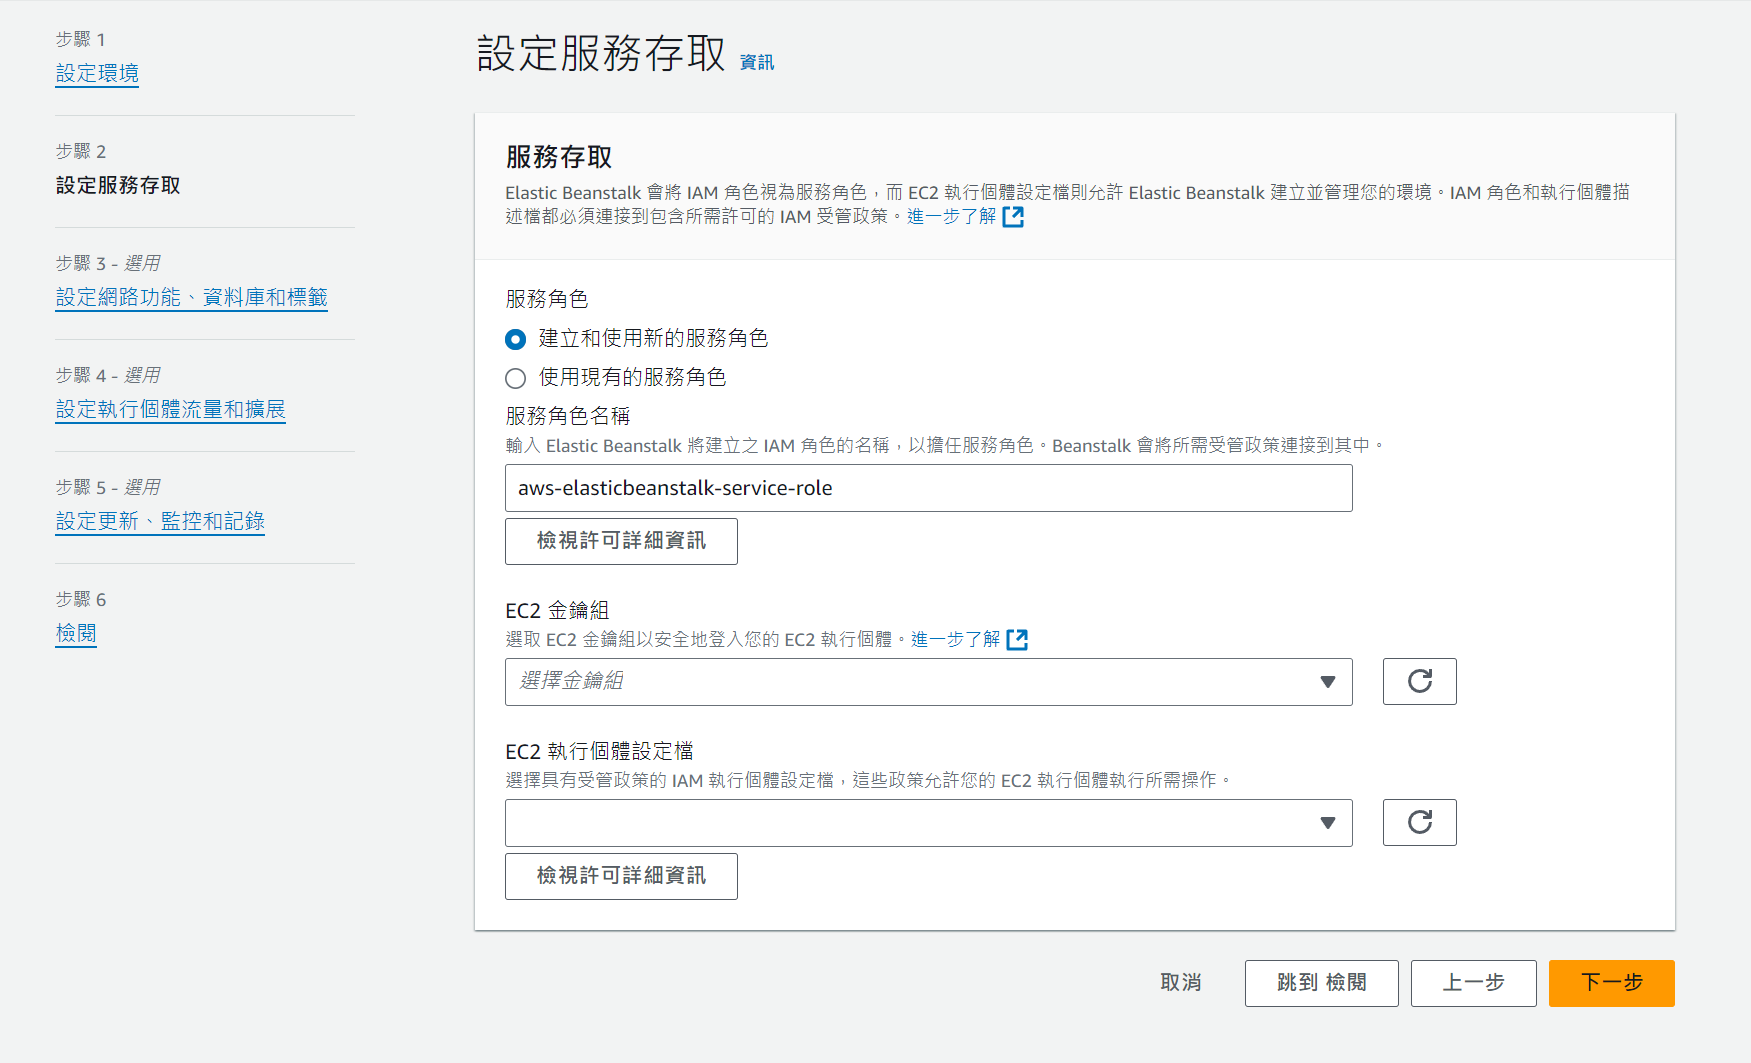

---
此可跳過
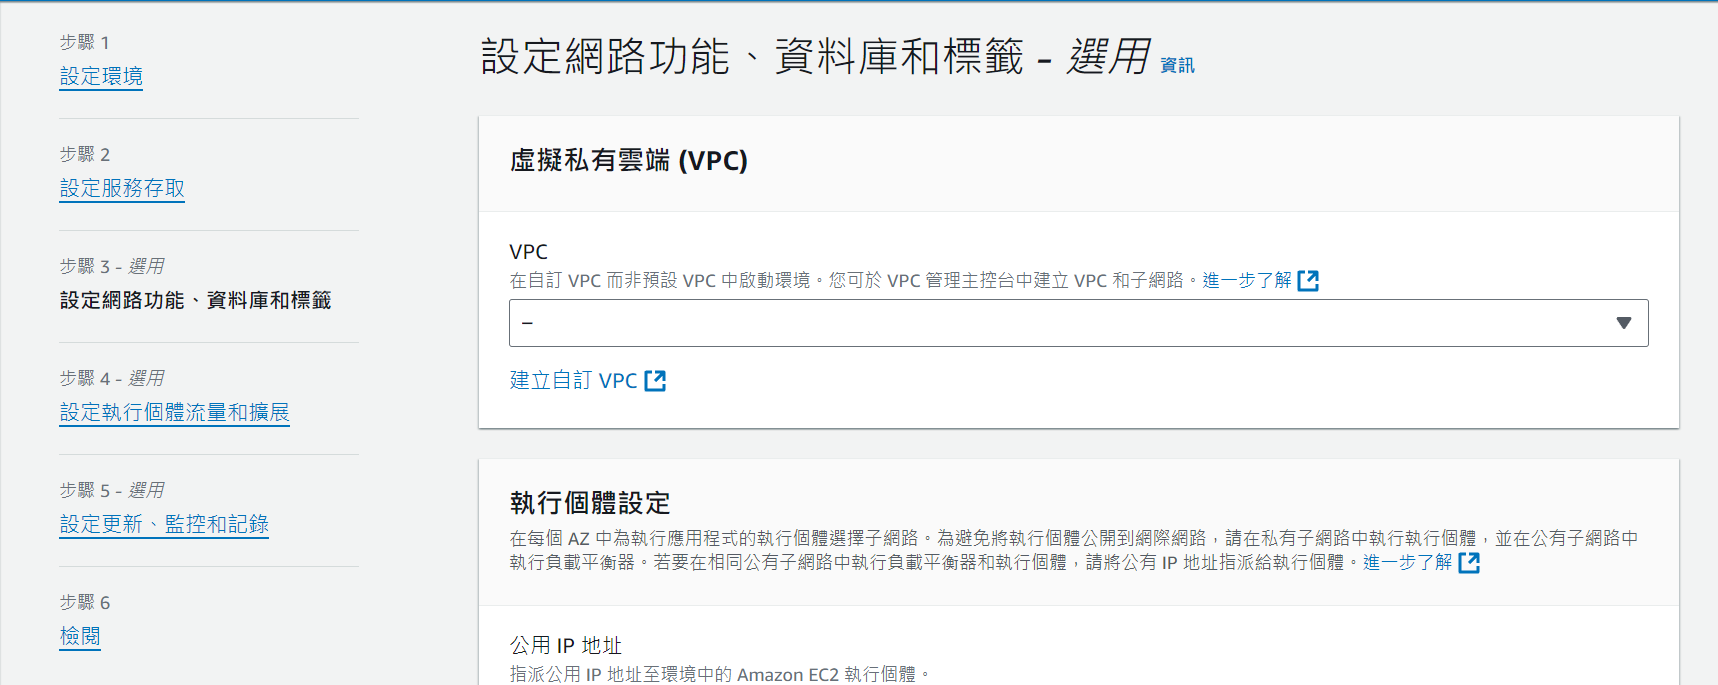

---
此為預設
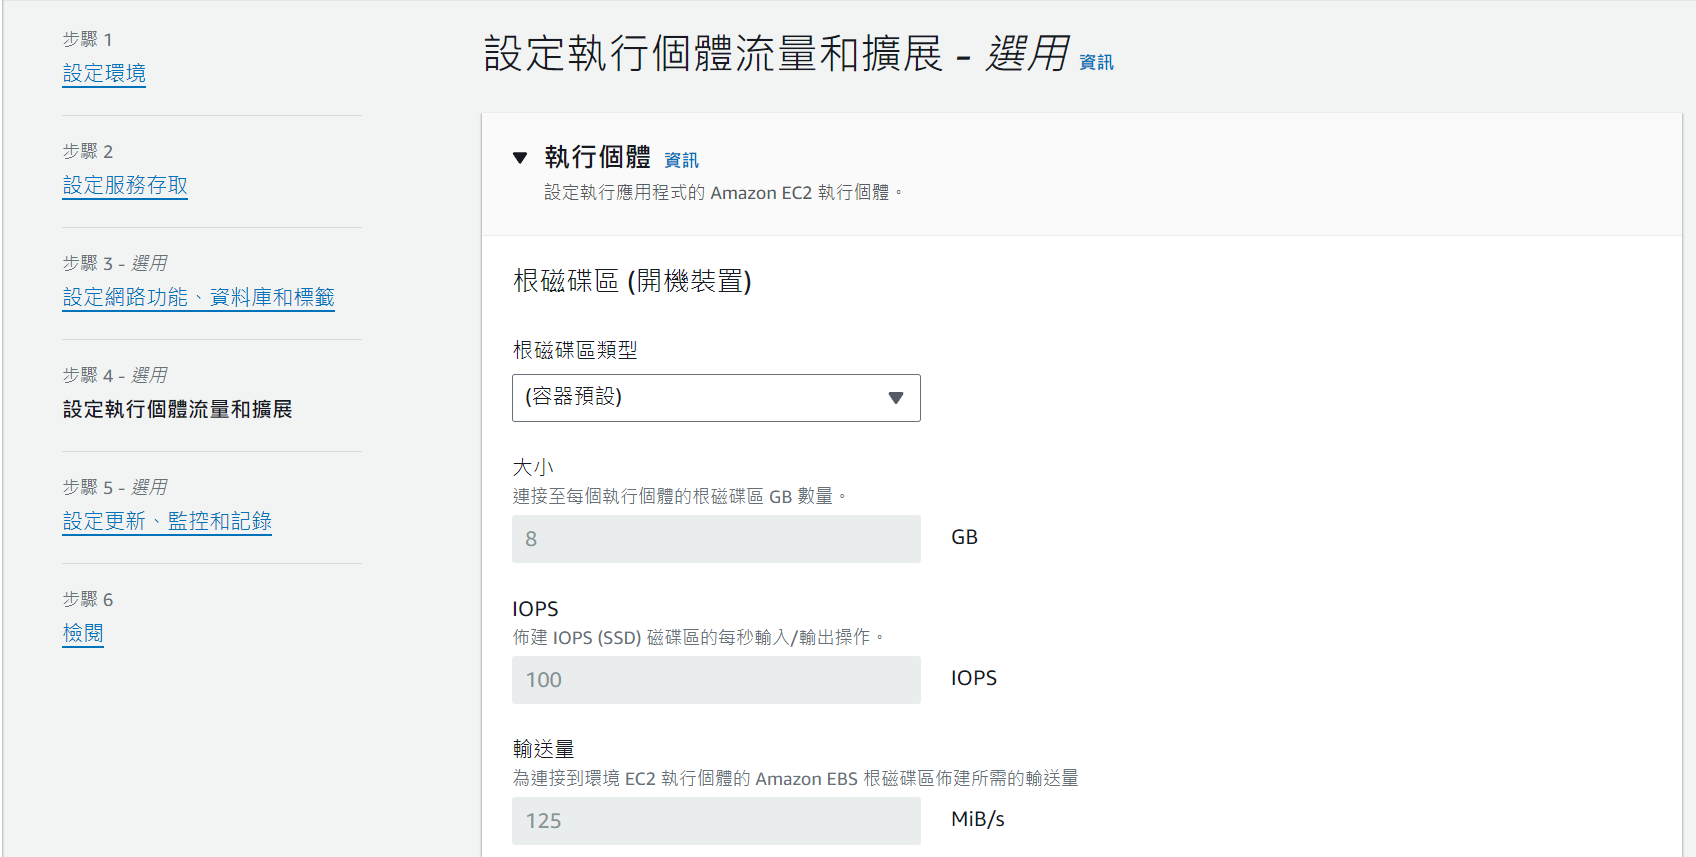

---
接下來都預設，然後開始建立
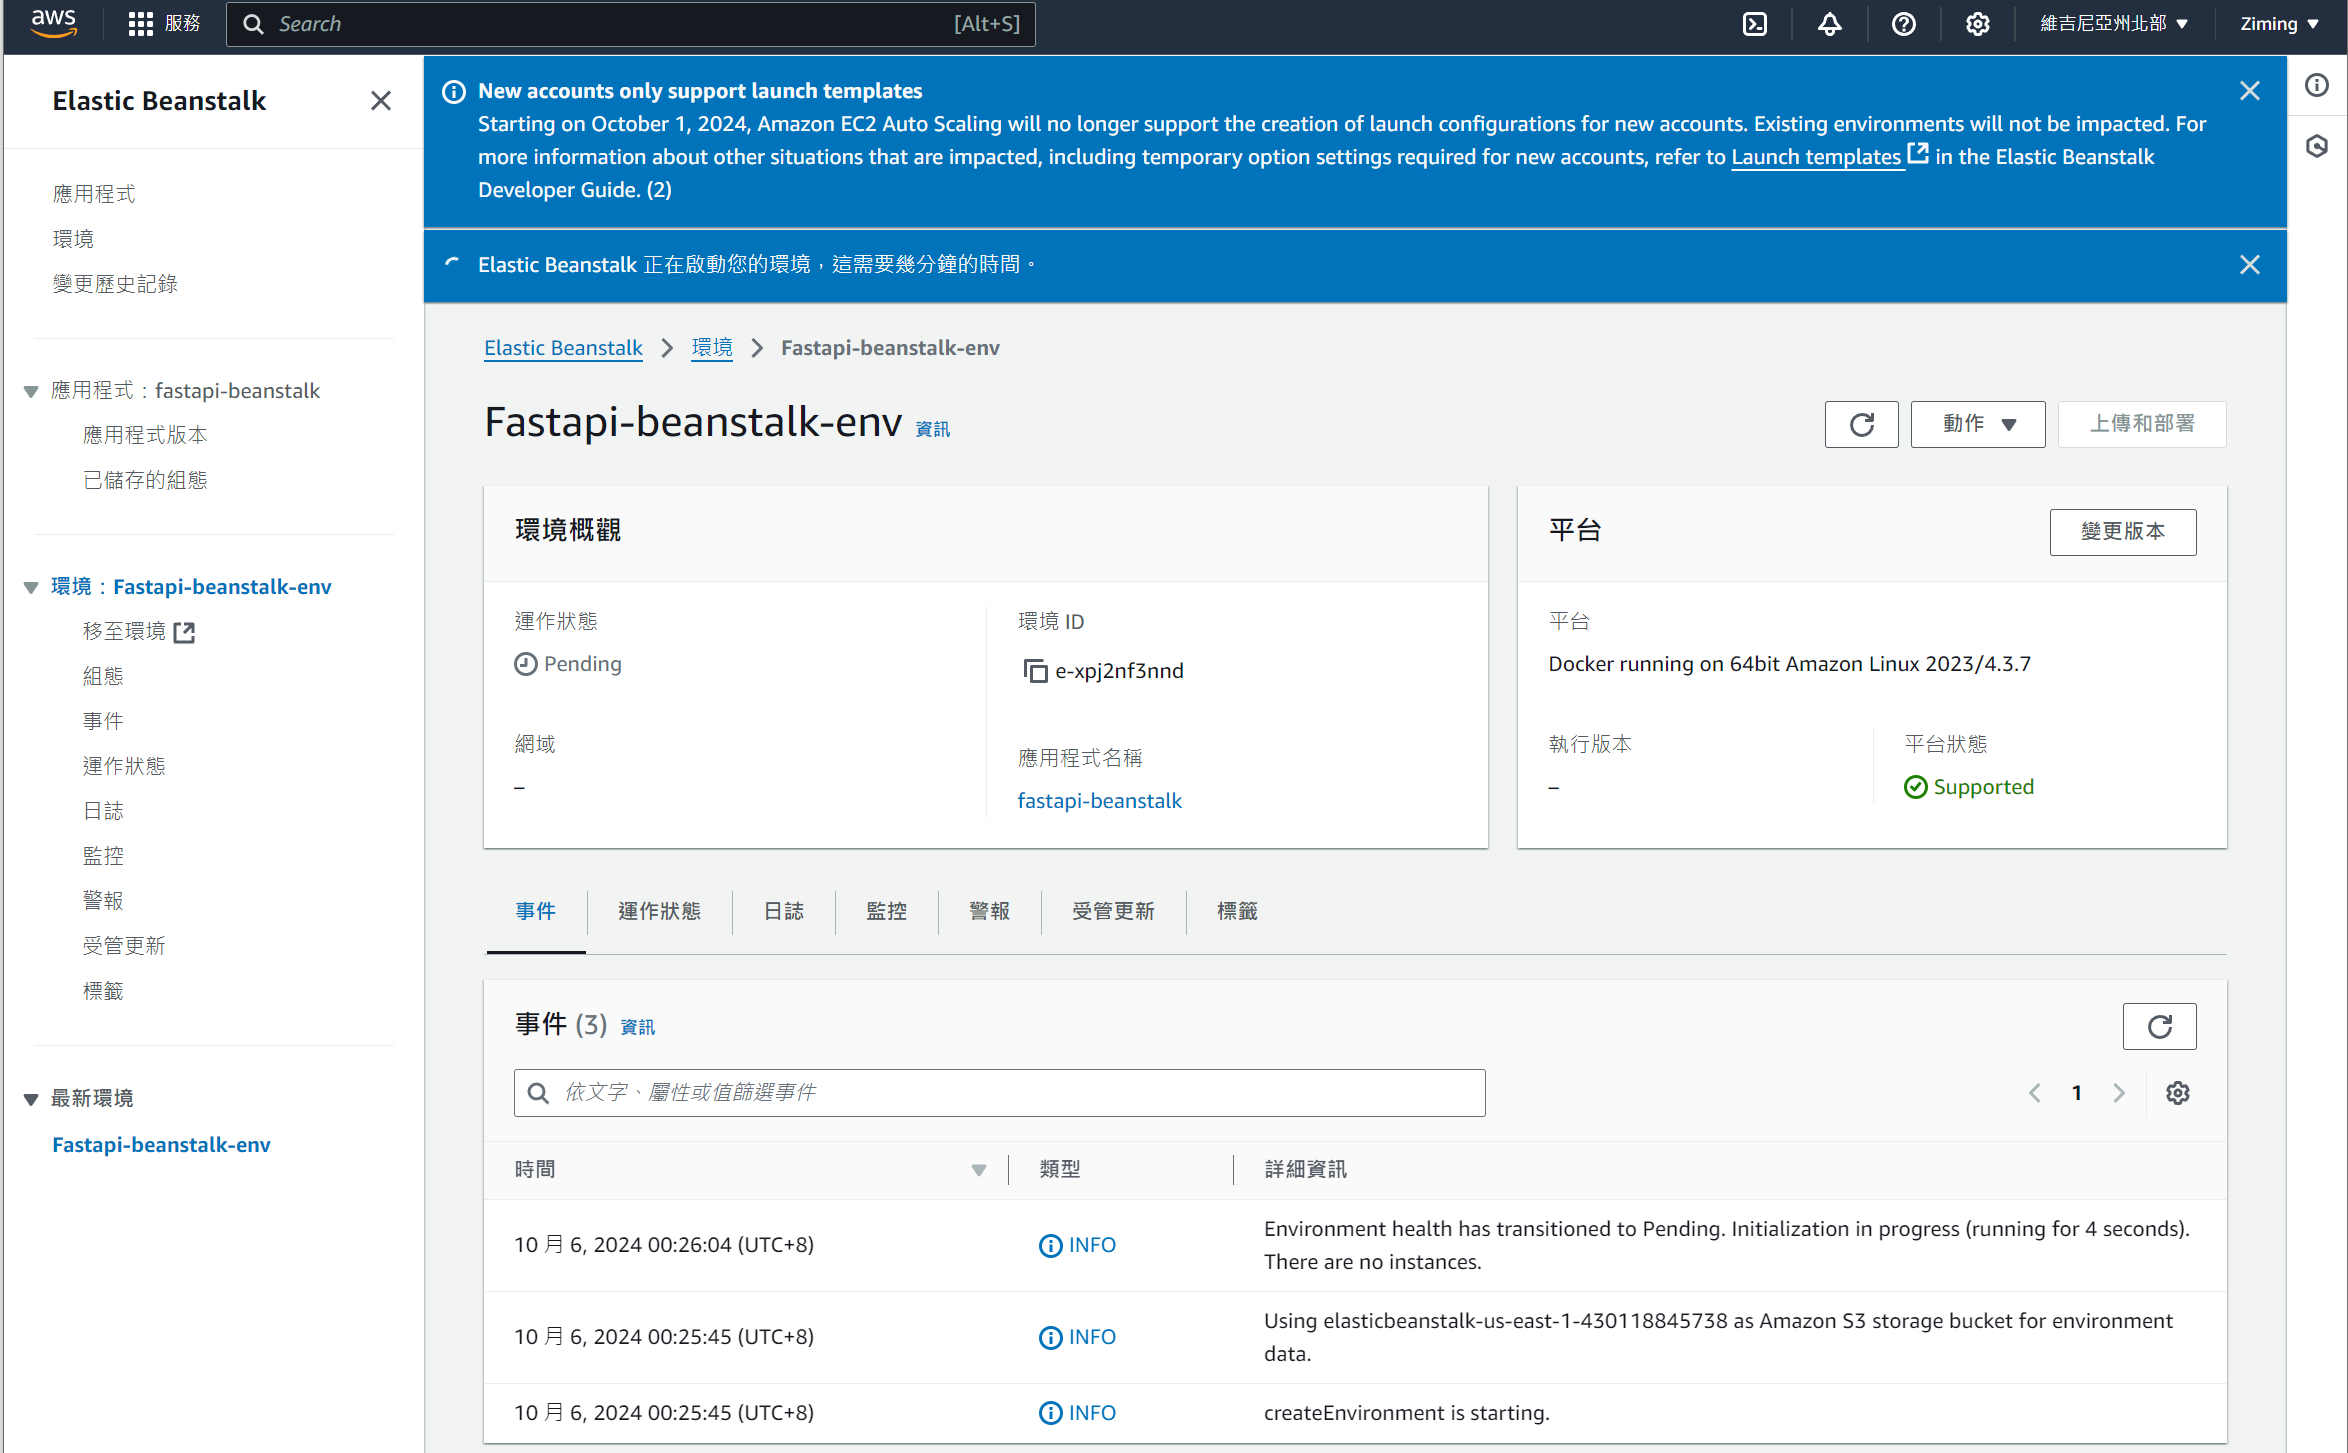

---

### **以下是 Docker 從本地部屬變成雲端部屬的檔案更改**

---

### **docker-compose.yml**

 `docker-compose.yml` 配置中使用了本地路徑（例如 `D:/Learning_Python/...`），這樣的路徑會在本地電腦上運行 Docker 時有效，但當你將應用部署到像 AWS Elastic Beanstalk 這樣的雲端服務上時，這些路徑將不再有效，因為雲端服務無法訪問你本地的文件系統。

**解決方法：**

當應用程序部署到雲端時，你應該確保所有需要的文件都被打包並包含在 Docker image 中，這樣它們可以在雲端環境內部使用。具體來說：

1. **移除本地路徑映射**：
   - 將 `volumes` 區塊移除或調整，以便不依賴本地路徑。
   
2. **打包必要的文件**：
   - 確保 `Dockerfile` 中正確包含了應用運行所需的文件，例如模型文件、程式碼、配置文件等。
   - 你可以使用 `COPY` 指令將這些必要的文件複製到 Docker image 中。

例如，你可以修改 `Dockerfile`，將你本地的所有必要文件複製到容器內：

```dockerfile
COPY ./yolov5-master /app/yolov5-master
```

這樣，當你部署應用時，所有需要的文件將會包含在 Docker image 中，Elastic Beanstalk 就不需要再依賴本地路徑了。

**總結**：
- 本地的絕對路徑在雲端環境中無法使用，因為它們不會存在於雲服務的文件系統中。
- 你需要確保所有文件都被正確打包到 Docker image 內，而不是依賴本地的文件系統。

---

### **main.py**

FastAPI 應用中載入 YOLO 模型的路徑 `/app/exp2/weights/best.pt` 和圖片保存的路徑 `/app/yolov5-master/runs/detect/` 需要保持相對一致性，確保它們在容器內能夠正確被訪問。由於你已經在 Dockerfile 中將資料夾正確地複製進了 `/app/` 目錄，因此可以保持使用 `/app/` 為根目錄的路徑。

### 具體需要做的修改：
1. 確認你的模型 `best.pt` 位於 `/app/exp2/weights/`。
2. 確保上傳的圖片文件和結果保存的文件位於 `/app/yolov5-master/runs/detect/`。

### 說明：
1. **模型路徑檢查**：程式會檢查模型的路徑是否存在，避免雲端環境中出現模型丟失的情況。
2. **檢查和創建目錄**：在存儲上傳圖片前，檢查目錄 `/app/yolov5-master/runs/detect` 是否存在，若不存在則自動創建，以避免潛在的路徑錯誤。

---

**Amazon Elastic Beanstalk** 直接從 AWS 網站上進行部署，那麼你不需要在本地運行 `docker build` 命令。Amazon Elastic Beanstalk 會自動處理 Docker 容器的構建和部署過程。

### 總結步驟：
1. **準備 Dockerfile**：`Dockerfile`它會指示 Elastic Beanstalk 自動構建你的應用環境。

2. **打包並上傳專案**：
   - 將你的專案目錄（包括 `Dockerfile`、`requirements.txt`、`yolov5-master` 資料夾等）壓縮成一個 `.zip` 檔案。
   - 這樣做的目的是方便在 AWS Elastic Beanstalk 的管理界面上進行上傳和部署。

3. **部署到 Elastic Beanstalk**：
   - 登錄到 AWS Elastic Beanstalk 控制台，並選擇新建應用程式。
   - 選擇你使用的 Docker 平台（如先前所選擇的 `Docker running on 64bit Amazon Linux 2023`）。
   - 在應用程式源代碼部分，選擇上傳 `.zip` 壓縮包。
   - 然後按照 AWS Elastic Beanstalk 的步驟進行，系統會自動構建和啟動容器。

4. **檢查部署狀態**：
   - 部署完成後，你可以在 Elastic Beanstalk 的儀表板上查看應用的狀態。
   - 在儀表板中，你還能看到應用的 URL，通過這個 URL 你可以訪問你的 FastAPI 應用。

5. **測試應用**：
   - 一旦部署成功，你可以使用 `http://<你的 AWS 應用 URL>:8000/docs` 來測試你的 FastAPI 應用介面，並檢查 API 端點是否能正常運行。

Elastic Beanstalk 會自動處理環境的構建和部署，你只需要提供完整的應用程式源代碼（包含 Dockerfile 和所需的應用文件）。

---

### **可能出現的錯誤**
#### [可至連接參考](https://www.youtube.com/watch?v=pbUFV27Py8E)

---

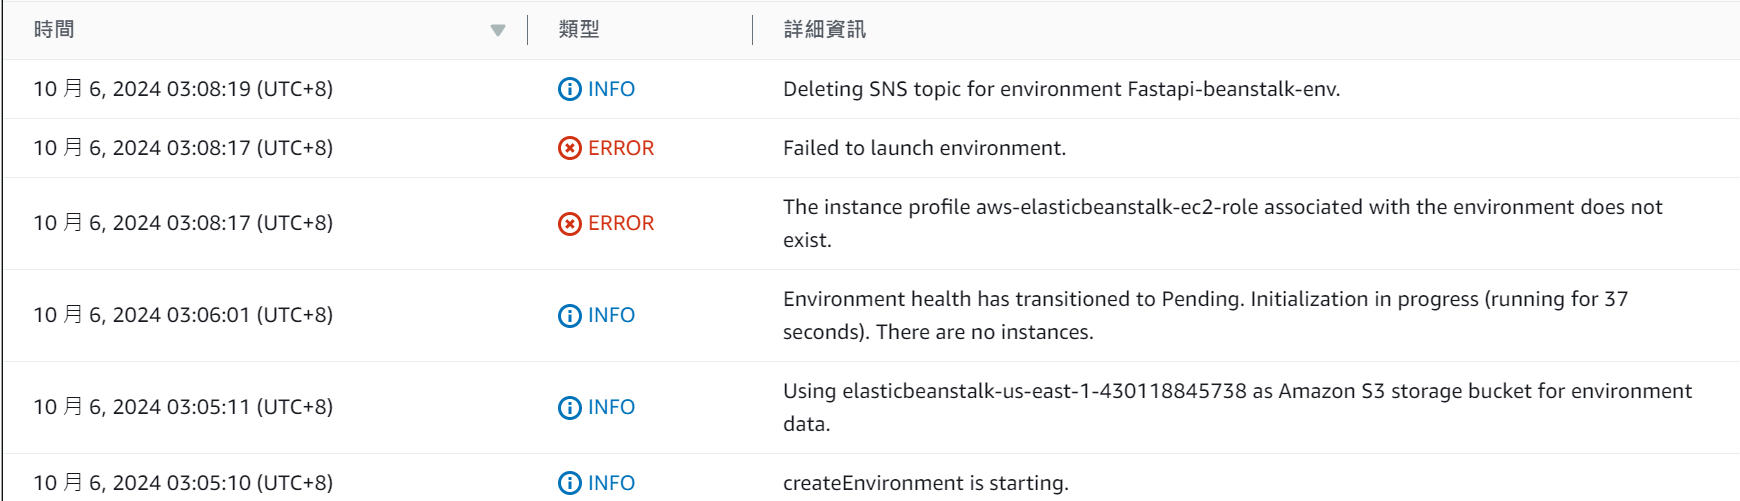

---

根據錯誤訊息，問題是因為「`aws-elasticbeanstalk-ec2-role`」這個 EC2 角色不存在，導致環境無法啟動。具體錯誤訊息為：

```
The instance profile aws-elasticbeanstalk-ec2-role associated with the environment does not exist.
```

這個角色是 AWS Elastic Beanstalk 需要用來允許 EC2 實例執行所需操作的角色。要解決這個問題，你可以按照以下步驟進行修復：

### 修復步驟：

1. **建立 `aws-elasticbeanstalk-ec2-role` 角色：**
   - 登入 AWS 控制台。
   - 在服務中搜尋並進入「IAM」。
   - 點擊左側的「角色」，然後點擊「創建角色」。
   - 選擇「Elastic Beanstalk」服務，然後選擇「Elastic Beanstalk EC2 角色」。
   - 按照預設選項完成角色創建，確保角色名稱為 `aws-elasticbeanstalk-ec2-role`。

   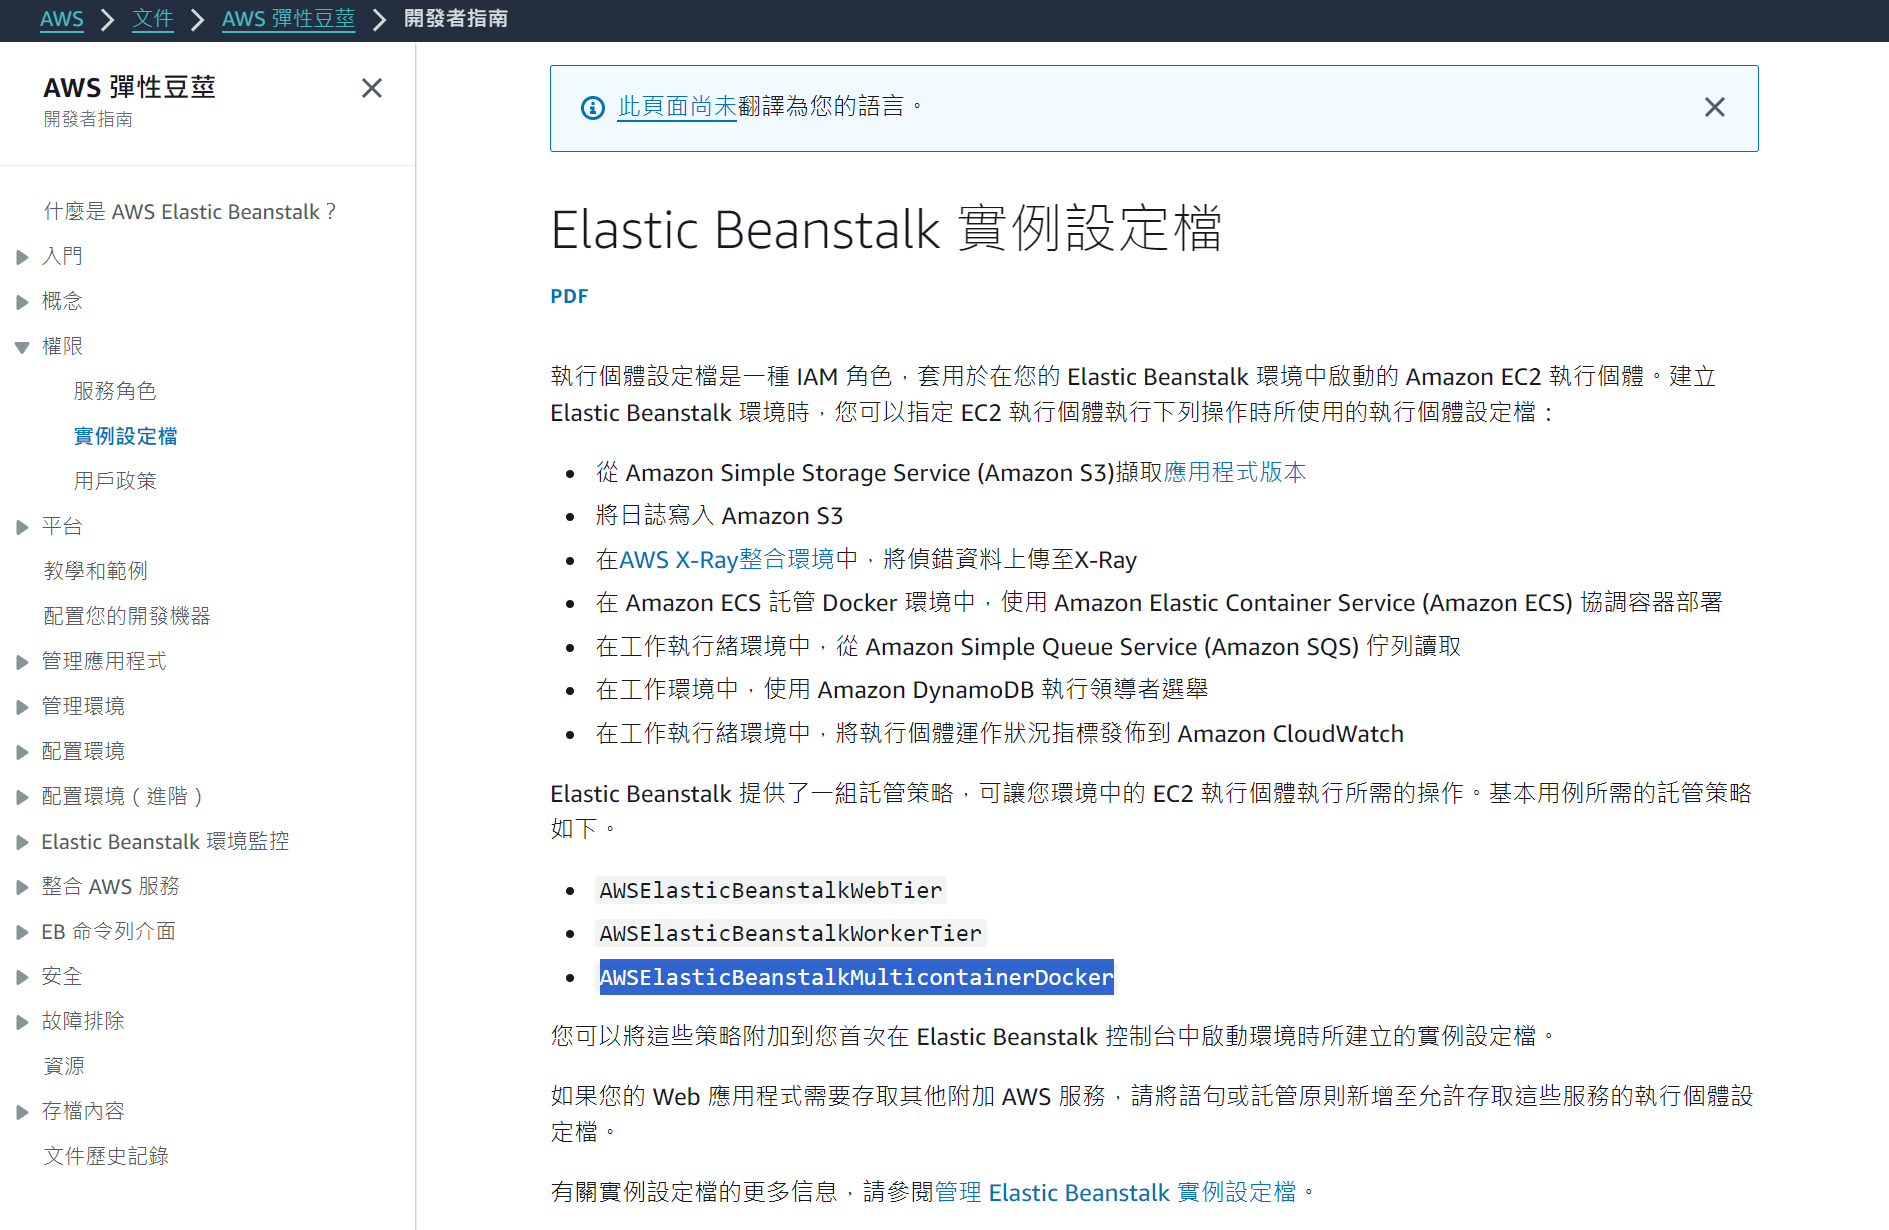

   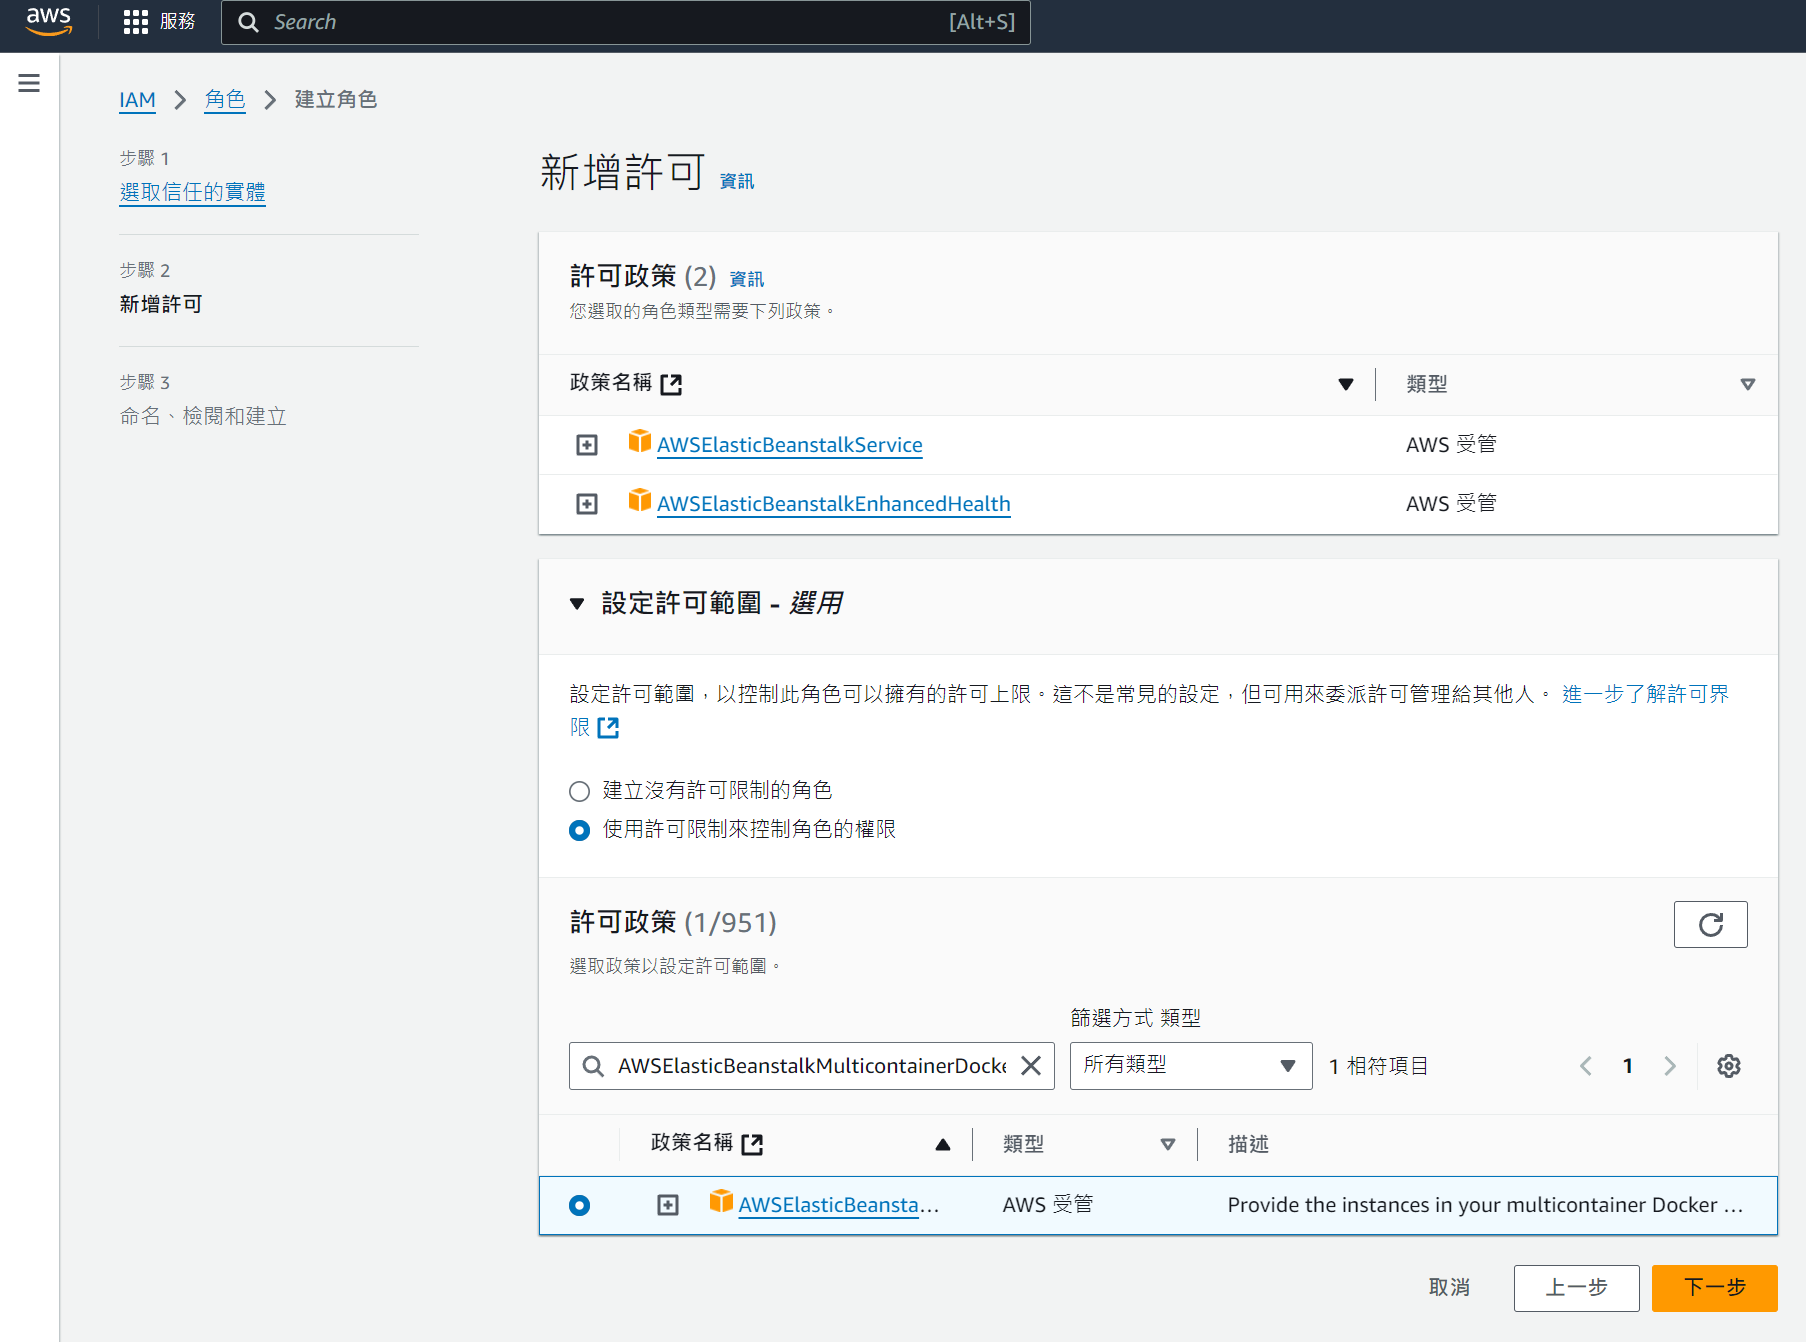

2. **重新建立 Elastic Beanstalk 環境：**
   - 返回到 Elastic Beanstalk 管理界面，刪除當前的環境，然後重新建立新的環境。

3. **選擇正確的 EC2 角色：**
   - 當你在 Elastic Beanstalk 配置階段選擇 EC2 角色時，確認選擇你剛剛創建的 `aws-elasticbeanstalk-ec2-role`。

如果你完成這些步驟後問題依然存在，可能需要進一步檢查 IAM 角色和權限設定是否正確。這個問題通常是由於缺少必要的角色或權限引起的。

---